# Crime data from 2013

http://www.houstontx.gov/police/cs/crime-stats-archives.htm

In [1]:
import pandas as pd
import glob, os
import numpy as np
import matplotlib.pyplot as plt
import datetime  as dt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
ls data/2013

apr13.xls*  dec13.xls*  jan13.xls*  jun13.xls*  may13.xls*  oct13.xls*
aug13.xls*  feb13.xls*  jul13.xls*  mar13.xls*  nov13.xls*  sep13.xls*


In [3]:
path = 'data/2013'

In [4]:
# combine all files into one df
all_files = glob.glob(os.path.join(path, "*.xls")) 
df_from_each_file = (pd.read_excel(f) for f in all_files)
df   = pd.concat(df_from_each_file, ignore_index=True)

In [5]:
df.head()

,# Of Offenses,Beat,Block Range,Date,Hour,Offense Type,Premise,Street Name,Suffix,Type,Unnamed: 1
0,1,19G10,9400-9499,2013-04-25,5,Murder,13R,WOODFAIR,-,DR,NaN
1,1,17E40,6100-6199,2013-04-14,0,Murder,18A,BELLFORT,W,ST,NaN
2,1,20G10,9900-9999,2013-04-02,16,Murder,20A,RICHMOND,-,AVE,NaN
3,1,2A20,1300-1399,2013-04-19,22,Murder,13R,29TH,E,ST,NaN
4,1,1A10,500-599,2013-04-23,0,Murder,190,RUSK,-,-,NaN


In [6]:
# get premise codes

pc = pd.read_csv('data/premise_codes.csv')
pc.head()

,Premise Type,Premise Description
0,01A,AIRPORT TERMINAL
1,01B,BUS STATION
2,01K,RAILROAD TRACK/RIGHT OF WAY
3,01P,PARK & RIDE TERMINAL
4,01R,LIGHT RAIL VEHICLE


In [7]:
# rename premise column for easy merge
pc.rename(columns={'Premise Type': 'Premise',}, inplace=True)
pc.head()

,Premise,Premise Description
0,01A,AIRPORT TERMINAL
1,01B,BUS STATION
2,01K,RAILROAD TRACK/RIGHT OF WAY
3,01P,PARK & RIDE TERMINAL
4,01R,LIGHT RAIL VEHICLE


## Check for missing values

In [8]:
df.apply(lambda x: sum(x.isnull()))

# Of Offenses         0
Beat                  0
Block Range           0
Date                  0
Hour                  0
Offense Type          0
Premise               0
Street Name           0
Suffix                0
Type                  0
Unnamed: 1       130459
dtype: int64

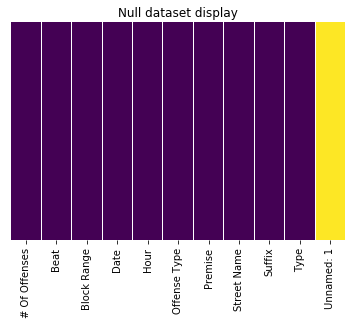

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Null dataset display')
plt.show()

## Cleanup

- joining similar columns
- renaming

In [10]:
df.rename(columns={
    '# Of Offenses': 'NumOffenses',
     'Offense Type': 'OffenseType',
    'Block Range': 'BlockRange',
    'Street Name': 'StreetName'
}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130459 entries, 0 to 130458
Data columns (total 11 columns):
NumOffenses    130459 non-null int64
Beat           130459 non-null object
BlockRange     130459 non-null object
Date           130459 non-null datetime64[ns]
Hour           130459 non-null int64
OffenseType    130459 non-null object
Premise        130459 non-null object
StreetName     130459 non-null object
Suffix         130459 non-null object
Type           130459 non-null object
Unnamed: 1     0 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 10.9+ MB


In [11]:
df.apply(lambda x: sum(x.isnull()))

NumOffenses         0
Beat                0
BlockRange          0
Date                0
Hour                0
OffenseType         0
Premise             0
StreetName          0
Suffix              0
Type                0
Unnamed: 1     130459
dtype: int64

## Subset dataframe to work on 

In [12]:
crimes = df[['Date','Beat','BlockRange','StreetName','OffenseType','Premise','NumOffenses','Hour']]
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130459 entries, 0 to 130458
Data columns (total 8 columns):
Date           130459 non-null datetime64[ns]
Beat           130459 non-null object
BlockRange     130459 non-null object
StreetName     130459 non-null object
OffenseType    130459 non-null object
Premise        130459 non-null object
NumOffenses    130459 non-null int64
Hour           130459 non-null int64
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 8.0+ MB


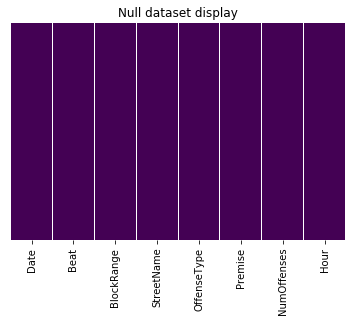

In [13]:
sns.heatmap(crimes.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Null dataset display')
plt.show()

## Join datafames
 join premise df with crime to extract num values

In [14]:
crimes.Premise.value_counts(dropna=False)[:10]

20R    16499
20A    15958
18A    14756
13R     9713
20D     8486
18O     8178
080     4213
18R     3704
120     3653
18P     2788
Name: Premise, dtype: int64

In [15]:
# join two datarames
crimes = pd.merge(crimes, pc, on='Premise', how='outer')
crimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130461 entries, 0 to 130460
Data columns (total 9 columns):
Date                   130459 non-null datetime64[ns]
Beat                   130459 non-null object
BlockRange             130459 non-null object
StreetName             130459 non-null object
OffenseType            130459 non-null object
Premise                130461 non-null object
NumOffenses            130459 non-null float64
Hour                   130459 non-null float64
Premise Description    129358 non-null object
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 10.0+ MB


In [16]:
crimes[['Premise', 'Premise Description']]

,Premise,Premise Description
0,13R,ROAD/STREET/SIDEWALK
1,13R,ROAD/STREET/SIDEWALK
2,13R,ROAD/STREET/SIDEWALK
3,13R,ROAD/STREET/SIDEWALK
4,13R,ROAD/STREET/SIDEWALK
5,13R,ROAD/STREET/SIDEWALK
6,13R,ROAD/STREET/SIDEWALK
7,13R,ROAD/STREET/SIDEWALK
8,13R,ROAD/STREET/SIDEWALK
9,13R,ROAD/STREET/SIDEWALK


In [17]:
crimes.head()

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description
0,2013-04-25,19G10,9400-9499,WOODFAIR,Murder,13R,1.0,5.0,ROAD/STREET/SIDEWALK
1,2013-04-19,2A20,1300-1399,29TH,Murder,13R,1.0,22.0,ROAD/STREET/SIDEWALK
2,2013-04-18,14D20,4000-4099,REDBUD,Murder,13R,1.0,21.0,ROAD/STREET/SIDEWALK
3,2013-04-20,2A60,1900-1999,ELLA,Rape,13R,1.0,20.0,ROAD/STREET/SIDEWALK
4,2013-04-06,2A50,4200-4299,KOEHLER,Rape,13R,1.0,4.0,ROAD/STREET/SIDEWALK


In [18]:
crimes.apply(lambda x: sum(x.isnull()))

Date                      2
Beat                      2
BlockRange                2
StreetName                2
OffenseType               2
Premise                   0
NumOffenses               2
Hour                      2
Premise Description    1103
dtype: int64

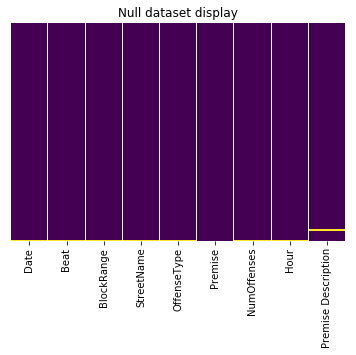

In [19]:
sns.heatmap(crimes.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Null dataset display')
plt.show()

In [20]:
crimes[crimes['Premise'] == '---'].head()

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description
124086,2013-04-24,12D40,11800-11899,TEANECK,Aggravated Assault,---,1.0,22.0,NaN
124087,2013-04-22,1A20,500-599,SUL ROSS,Aggravated Assault,---,1.0,16.0,NaN
124088,2013-04-19,7C20,3500-3599,LOCKWOOD,Aggravated Assault,---,1.0,15.0,NaN
124089,2013-04-02,18F50,9200-9299,RICHMOND,Aggravated Assault,---,1.0,20.0,NaN
124090,2013-04-03,16E20,13300-13399,HIRAM CLARKE,Aggravated Assault,---,1.0,7.0,NaN


In [21]:
len(crimes[crimes['Premise'] == '---'])

1019

In [22]:
len(crimes[crimes['Premise'] == 'N'])

41

In [23]:
crimes.loc[crimes['Premise Description'].isnull(),'Premise Description'] = crimes['Premise']

In [24]:
len(crimes[crimes['Premise Description'].isnull()])

0

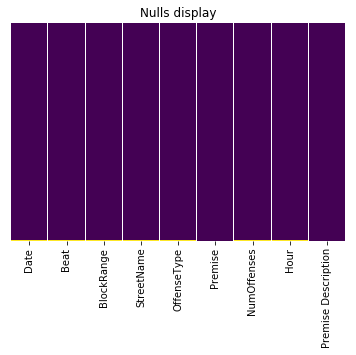

In [25]:
sns.heatmap(crimes.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Nulls display')
plt.show()

In [26]:
crimes.apply(lambda x: sum(x.isnull()))

Date                   2
Beat                   2
BlockRange             2
StreetName             2
OffenseType            2
Premise                0
NumOffenses            2
Hour                   2
Premise Description    0
dtype: int64

## drop rows with 2 or 3 missing values

In [27]:
#crimes = crimes.dropna(thresh=3)
crimes = crimes.dropna(subset=['Date'])

In [28]:
crimes.apply(lambda x: sum(x.isnull()))

Date                   0
Beat                   0
BlockRange             0
StreetName             0
OffenseType            0
Premise                0
NumOffenses            0
Hour                   0
Premise Description    0
dtype: int64

In [29]:
crimes = crimes.dropna(thresh=3)

In [30]:
crimes.apply(lambda x: sum(x.isnull()))

Date                   0
Beat                   0
BlockRange             0
StreetName             0
OffenseType            0
Premise                0
NumOffenses            0
Hour                   0
Premise Description    0
dtype: int64

# FIND NAN

## Find NaN
- drop if > 2 nan

In [31]:
crimes.apply(lambda x: sum(x.isnull()))

Date                   0
Beat                   0
BlockRange             0
StreetName             0
OffenseType            0
Premise                0
NumOffenses            0
Hour                   0
Premise Description    0
dtype: int64

In [32]:
crimes[crimes.isnull().any(axis=1)].head()

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description


## Problem
- find nan values and fix

In [33]:
null_premise = crimes.Premise.isnull()

In [34]:
crimes['Premise'] = crimes["Premise"].fillna('none')

In [35]:
crimes.apply(lambda x: sum(x.isnull()))

Date                   0
Beat                   0
BlockRange             0
StreetName             0
OffenseType            0
Premise                0
NumOffenses            0
Hour                   0
Premise Description    0
dtype: int64

## Inspect each column

In [36]:
crimes.dtypes

Date                   datetime64[ns]
Beat                           object
BlockRange                     object
StreetName                     object
OffenseType                    object
Premise                        object
NumOffenses                   float64
Hour                          float64
Premise Description            object
dtype: object

## Beat column
- total beats should be around 120

In [37]:
len(crimes.Beat.value_counts())

120

In [38]:
len(crimes.Beat.value_counts(dropna=False))

120

In [39]:
crimes.Beat.unique()[:10]

array(['19G10', '2A20', '14D20', '2A60', '2A50', '19G20', '6B40', '8C10',
       '17E30', '16E10'], dtype=object)

In [40]:
# replace extra ' with empty space
crimes['Beat'] = crimes.Beat.str.replace("'", " ")

In [41]:
len(crimes.Beat.value_counts(dropna=False))

120

In [42]:
# strip empty spaces
crimes.Beat = crimes.Beat.str.strip()

In [43]:
len(crimes.Beat.value_counts(dropna=False))  # get the total

120

In [44]:
crimes.Beat.unique()

array(['19G10', '2A20', '14D20', '2A60', '2A50', '19G20', '6B40', '8C10',
       '17E30', '16E10', '9C40', '17E20', '7C10', '1A10', '8C40', '14D10',
       '10H40', '10H50', '13D20', '3B10', '10H60', '3B50', '1A20',
       '20G10', '6B60', '17E10', '15E20', '20G30', '16E20', '2A10',
       '18F40', '19G30', '7C30', '20G70', '16E30', '18F50', '17E40',
       '20G40', '6B10', '11H30', '20G20', '14D30', '7C20', '3B40',
       '15E30', '18F30', '10H20', '6B20', '6B30', '11H10', '6B50', '5F20',
       '1A30', '8C20', '2A30', '12D10', '19G50', '19G40', '13D10',
       '10H10', '5F30', '12D70', '20G60', '14D40', '24C30', '5F40',
       '1A40', '16E40', '3B30', '11H20', '8C60', '10H30', '9C30', '9C20',
       '13D40', '8C30', '7C40', '8C50', '10H80', '12D50', '24C10',
       '10H70', '9C10', '18F60', '4F10', '4F20', '11H50', '12D30', '1A50',
       '20G80', '18F10', '7C50', '18F20', '12D20', '20G50', '2A40',
       '24C40', 'UNK', '5F10', '21I50', '15E40', '12D60', '11H40',
       '15E10', '12

In [45]:
crimes.Beat.value_counts(dropna=False).head()

12D10    2787
19G10    2777
1A20     2651
13D20    2607
6B60     2589
Name: Beat, dtype: int64

## BlockRange

In [46]:
len(crimes.BlockRange.value_counts(dropna=False))

249

In [47]:
crimes.BlockRange.value_counts(dropna=False).head()

100-199      1879
900-999      1783
9500-9599    1607
700-799      1503
9400-9499    1485
Name: BlockRange, dtype: int64

In [48]:
# strip
crimes.BlockRange =crimes.BlockRange.str.strip()

In [49]:
len(crimes.BlockRange.value_counts(dropna=False))

249

## StreetName

In [50]:
print('before:{}'.format(len(crimes.StreetName.value_counts(dropna=False))))

before:7540


In [51]:
# remove extra spaces
crimes.StreetName = crimes.StreetName.str.strip()


# make all lower case
crimes.StreetName = crimes.StreetName.str.lower()

In [52]:
print('after:{}'.format(len(crimes.StreetName.value_counts(dropna=False))))

after:7540


In [53]:
print(crimes.StreetName.value_counts(dropna=False).head())

westheimer    3824
gulf          2035
gessner       1925
richmond      1726
north         1679
Name: StreetName, dtype: int64


## OffenseType
Total 7
- Theft
- Burlary
- Aggravated Assalult
- Robbery
- Auto Theft
- Rape
- Murder


In [54]:
print('before:{}'.format(len(crimes.OffenseType.value_counts(dropna=False))))

before:7


In [55]:
crimes.OffenseType = crimes.OffenseType.str.strip()

In [56]:
print('after:{}'.format(len(crimes.OffenseType.value_counts(dropna=False))))

after:7


In [57]:
print(crimes.OffenseType.value_counts(dropna=False))

Theft                 73591
Burglary              23733
Auto Theft            13147
Robbery                9891
Aggravated Assault     9274
Rape                    614
Murder                  209
Name: OffenseType, dtype: int64


In [58]:
# join Auto Theft & AutoTheft
crimes.OffenseType = crimes.OffenseType.replace('AutoTheft','Auto Theft')

#### fill nans with most common value

In [59]:
crimes = crimes.fillna(crimes['OffenseType'].value_counts().index[0])

In [60]:
print(crimes.OffenseType.value_counts(dropna=False))

Theft                 73591
Burglary              23733
Auto Theft            13147
Robbery                9891
Aggravated Assault     9274
Rape                    614
Murder                  209
Name: OffenseType, dtype: int64


## Premise

In [61]:
print('before:{}'.format(len(crimes['Premise Description'].value_counts(dropna=False))))

crimes['Premise Description'] = crimes['Premise Description'].str.strip()

crimes['Premise Description'] = crimes['Premise Description'].str.lower()

before:127


In [62]:
print('after:{}'.format(len(crimes.Premise.value_counts(dropna=False))))

after:127


In [63]:
crimes.Premise.value_counts(dropna=False).head()

20R    16499
20A    15958
18A    14756
13R     9713
20D     8486
Name: Premise, dtype: int64

# Date column

In [64]:
crimes.dtypes

Date                   datetime64[ns]
Beat                           object
BlockRange                     object
StreetName                     object
OffenseType                    object
Premise                        object
NumOffenses                   float64
Hour                          float64
Premise Description            object
dtype: object

## Date
- make datetime index

In [65]:
# date
crimes.Date = pd.to_datetime(crimes.Date)

crimes = crimes.set_index('Date').sort_index(ascending=True)

In [66]:
crimes.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description
Date,,,,,,,,
1963-02-02,10H40,3800-3899,main,Theft,09R,1.0,13.0,rehabilitation center
1972-06-01,12D50,16400-16499,brookvilla,Rape,20R,1.0,0.0,residence/house
1972-07-15,14D30,5300-5399,northridge,Burglary,---,1.0,20.0,---
1977-10-14,10H50,3200-3299,truxillo,Theft,18A,1.0,15.0,apartment parking lot
1979-07-01,11H10,100-199,eastgate,Rape,20R,1.0,0.0,residence/house


## Create Columns with day,weekday,month,year from datetime index

It allows us to view incorect reports by date better

In [67]:
# get day, weekday,month ,year

crimes['day'] = crimes.index.strftime('%d')
crimes['weekday'] = crimes.index.strftime('%A')
crimes['month'] = crimes.index.strftime('%b')
crimes['year'] = crimes.index.strftime('%Y')

In [68]:
crimes.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description,day,weekday,month,year
Date,,,,,,,,,,,,
1963-02-02,10H40,3800-3899,main,Theft,09R,1.0,13.0,rehabilitation center,02,Saturday,Feb,1963
1972-06-01,12D50,16400-16499,brookvilla,Rape,20R,1.0,0.0,residence/house,01,Thursday,Jun,1972
1972-07-15,14D30,5300-5399,northridge,Burglary,---,1.0,20.0,---,15,Saturday,Jul,1972
1977-10-14,10H50,3200-3299,truxillo,Theft,18A,1.0,15.0,apartment parking lot,14,Friday,Oct,1977
1979-07-01,11H10,100-199,eastgate,Rape,20R,1.0,0.0,residence/house,01,Sunday,Jul,1979


In [69]:
crimes.year.value_counts(dropna=False)

2013    129021
2012      1181
2011        49
2008        48
2005        34
2010        30
2009        14
2006        14
2004        12
2007        11
2000        10
2003         7
2001         5
1993         3
2014         2
1972         2
1980         2
2002         2
1987         1
1963         1
2019         1
1986         1
1990         1
1998         1
2033         1
1989         1
1977         1
1979         1
1994         1
1992         1
Name: year, dtype: int64

We can see now that many reports have incorect year

## null values

- check
- count
- display

In [70]:
crimes.apply(lambda x: sum(x.isnull()))

Beat                   0
BlockRange             0
StreetName             0
OffenseType            0
Premise                0
NumOffenses            0
Hour                   0
Premise Description    0
day                    0
weekday                0
month                  0
year                   0
dtype: int64

In [71]:
# display any null
len(crimes[crimes.isnull().any(axis=1)])

0

In [72]:
crimes[crimes.isnull().any(axis=1)].head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description,day,weekday,month,year
Date,,,,,,,,,,,,


In [73]:
crimes.apply(lambda x: sum(x.isnull()))

Beat                   0
BlockRange             0
StreetName             0
OffenseType            0
Premise                0
NumOffenses            0
Hour                   0
Premise Description    0
day                    0
weekday                0
month                  0
year                   0
dtype: int64

## New Dataframe
- remove premise col
- keep premise description

In [74]:
crime_yr = crimes[['Beat','BlockRange','StreetName','OffenseType','Premise Description','NumOffenses','Hour','day','weekday','month','year']]
crime_yr.head()

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
1963-02-02,10H40,3800-3899,main,Theft,rehabilitation center,1.0,13.0,02,Saturday,Feb,1963
1972-06-01,12D50,16400-16499,brookvilla,Rape,residence/house,1.0,0.0,01,Thursday,Jun,1972
1972-07-15,14D30,5300-5399,northridge,Burglary,---,1.0,20.0,15,Saturday,Jul,1972
1977-10-14,10H50,3200-3299,truxillo,Theft,apartment parking lot,1.0,15.0,14,Friday,Oct,1977
1979-07-01,11H10,100-199,eastgate,Rape,residence/house,1.0,0.0,01,Sunday,Jul,1979


In [75]:
crime_yr.apply(lambda x: sum(x.isnull()))

Beat                   0
BlockRange             0
StreetName             0
OffenseType            0
Premise Description    0
NumOffenses            0
Hour                   0
day                    0
weekday                0
month                  0
year                   0
dtype: int64

In [76]:
# change column name from Premise Descriptionto Premise

crime_yr.rename(columns={
    'Premise Description': 'Premise',}, inplace=True)


In [77]:
crime_yr.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
1963-02-02,10H40,3800-3899,main,Theft,rehabilitation center,1.0,13.0,02,Saturday,Feb,1963
1972-06-01,12D50,16400-16499,brookvilla,Rape,residence/house,1.0,0.0,01,Thursday,Jun,1972
1972-07-15,14D30,5300-5399,northridge,Burglary,---,1.0,20.0,15,Saturday,Jul,1972
1977-10-14,10H50,3200-3299,truxillo,Theft,apartment parking lot,1.0,15.0,14,Friday,Oct,1977
1979-07-01,11H10,100-199,eastgate,Rape,residence/house,1.0,0.0,01,Sunday,Jul,1979


## Save

In [78]:
crime_yr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 130459 entries, 1963-02-02 to 2033-04-21
Data columns (total 11 columns):
Beat           130459 non-null object
BlockRange     130459 non-null object
StreetName     130459 non-null object
OffenseType    130459 non-null object
Premise        130459 non-null object
NumOffenses    130459 non-null float64
Hour           130459 non-null float64
day            130459 non-null object
weekday        130459 non-null object
month          130459 non-null object
year           130459 non-null object
dtypes: float64(2), object(9)
memory usage: 11.9+ MB


In [79]:
crime_yr.to_csv('data/clean/crime13_clean.csv')

In [80]:
ls data/clean

crime10_clean.csv*  crime12_clean.csv*  crime14_clean.csv*  crime16_clean.csv*
crime11_clean.csv*  crime13_clean.csv*  crime15_clean.csv*  crime17_clean.csv*
